## Key Steps
### 1. Data Loading and Preprocessing

In [50]:
import pandas as pd
import numpy as np
from scipy import stats
import calendar
from matplotlib import pyplot as plt
import seaborn as sns
import os

# Load dataset
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')


In [51]:

# Data overview
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

0

In [52]:

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

### 2. Exploratory Data Analysis
#### Correlation Heatmap

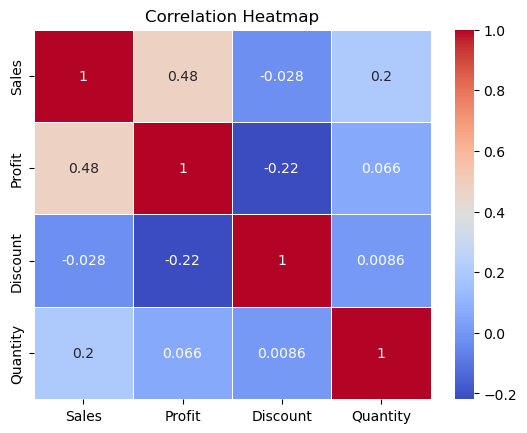

In [53]:
correlation_matrix = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Key Findings**:
- Positive correlation between Sales and Profit.
- Negative correlation between Discount and Profit.

### 3. Sales and profit by Category 

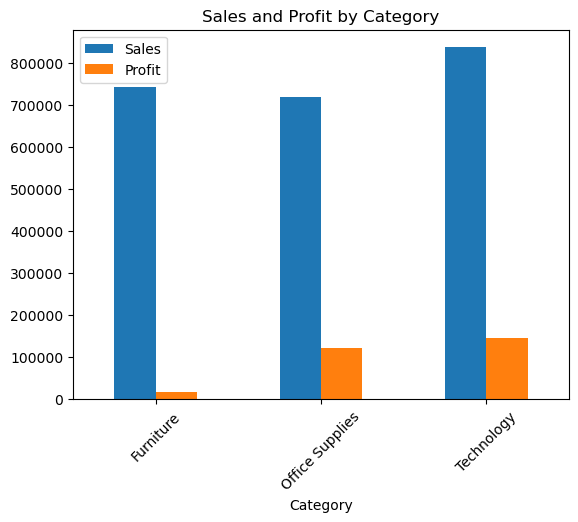

In [54]:
category_analysis = df.groupby('Category')[['Sales', 'Profit']].sum()

output_dir = 'visualizations'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# Create the bar plot
ax = category_analysis.plot(kind='bar', title='Sales and Profit by Category', rot=45)

# Save the plot as an image file
plt.savefig('visualizations/sales_profit_by_category.png', dpi=300, bbox_inches='tight')

# Optionally, show the plot
plt.show()

***Insight***: Technology has the highest sales and profit, Office Supplies has moderate sales but significantly higher profit margins, while Furniture has high sales but the lowest profit.

### 4. Sales and Profit by Region

<Axes: title={'center': 'Sales and Profit by Region'}, xlabel='Region'>

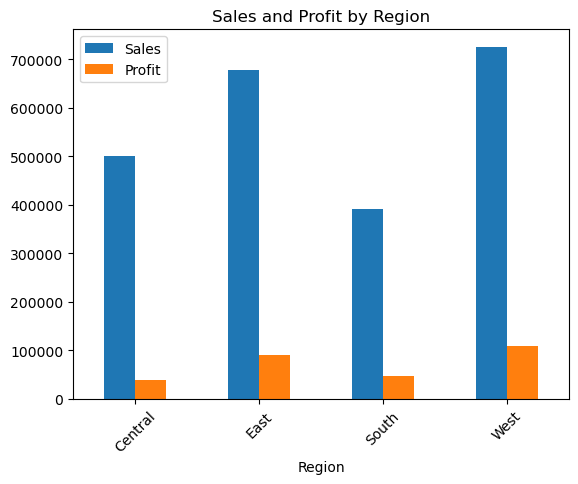

In [55]:
region_analysis = df.groupby('Region')[['Sales', 'Profit']].sum()
region_analysis.plot(kind='bar', title='Sales and Profit by Region', rot= 45)


***Insight***: The West region leads in both sales and profit, while the East has strong sales but slightly lower profit; the Central and South regions have comparatively lower sales and profit.

### 5. Time-Series Analysis
####  Sales and Profit Trends

<Figure size 640x480 with 0 Axes>

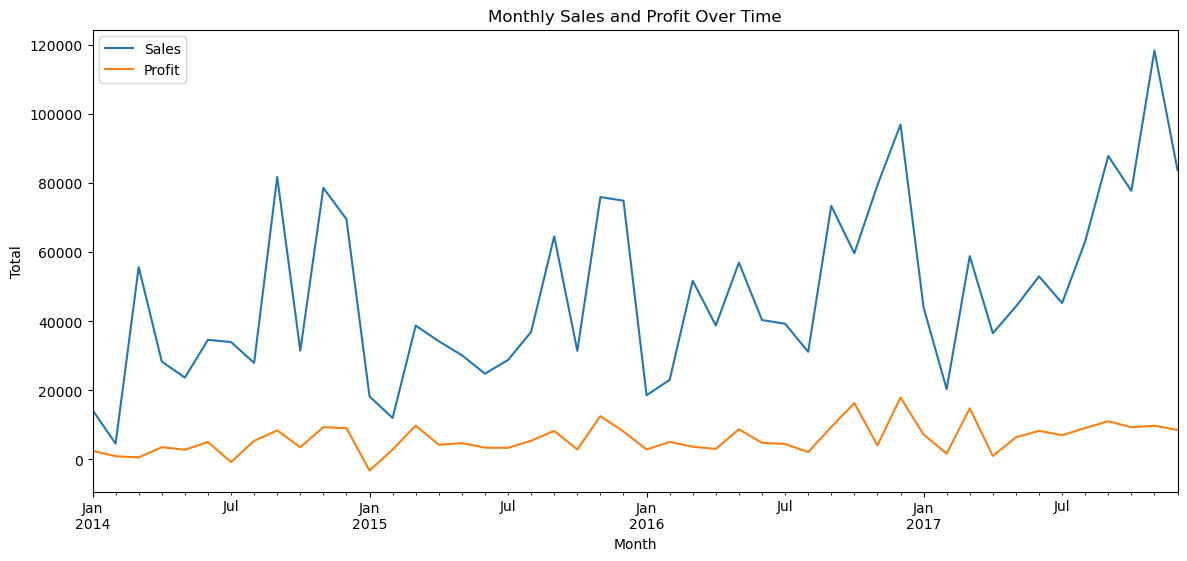

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


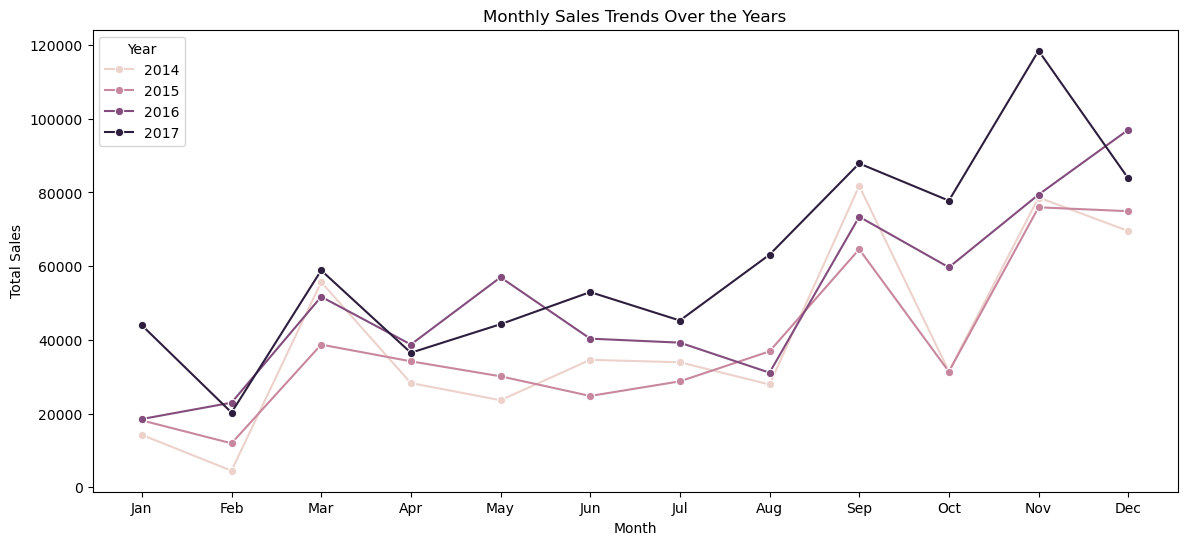

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


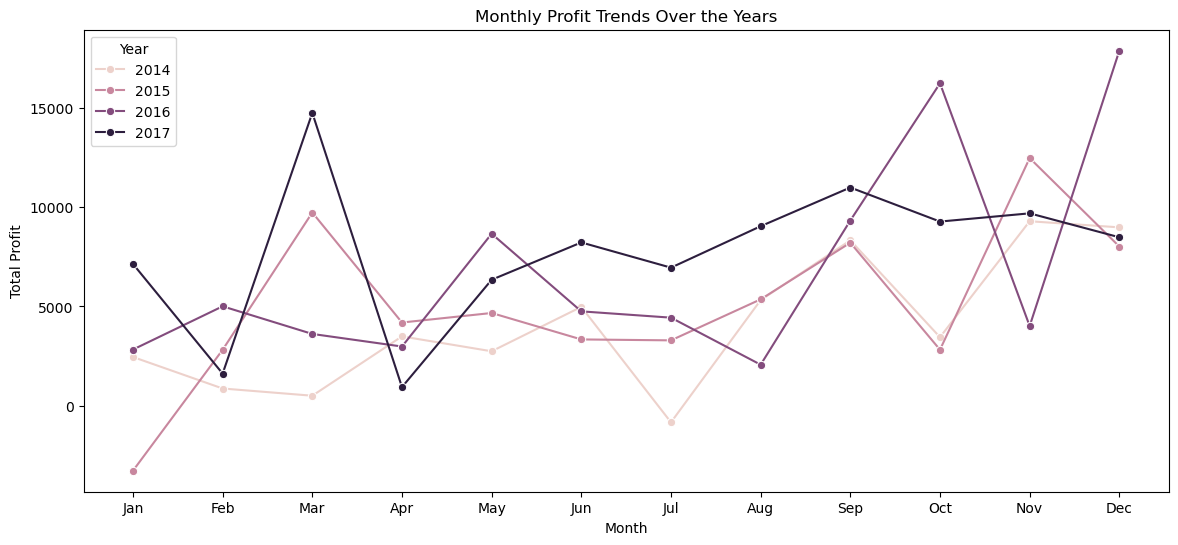

In [56]:
# Extracting month and year from Order Date
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year



plt.legend = plt.gcf().legend

monthly_trends = df.groupby(df['Order Date'].dt.to_period('M'))[['Sales', 'Profit']].sum()

monthly_trends.plot(figsize=(14, 6))
plt.title('Monthly Sales and Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Total')
plt.show()

# Aggregating sales and profit by month and year
monthly_trends = df.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Plotting Sales and Profit by Month and Year
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trends, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trends Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), calendar.month_abbr[1:13])
plt.legend(title='Year')  # Ensure this is not redefined or altered elsewhere
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trends, x='Month', y='Profit', hue='Year', marker='o')
plt.title('Monthly Profit Trends Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(range(1, 13), calendar.month_abbr[1:13])
plt.legend(title='Year')
plt.show()


***Insight***:
- **Best Year (Sales and Profit):** 2017 had the highest sales and profit overall.  
- **Worst Year (Sales and Profit):** 2014 recorded the lowest sales and profit.  
- **Growth:** Sales and profit showed steady growth from 2014 to 2017.

### 6. Product Line Analysis
#### Top 10 Products by Profit

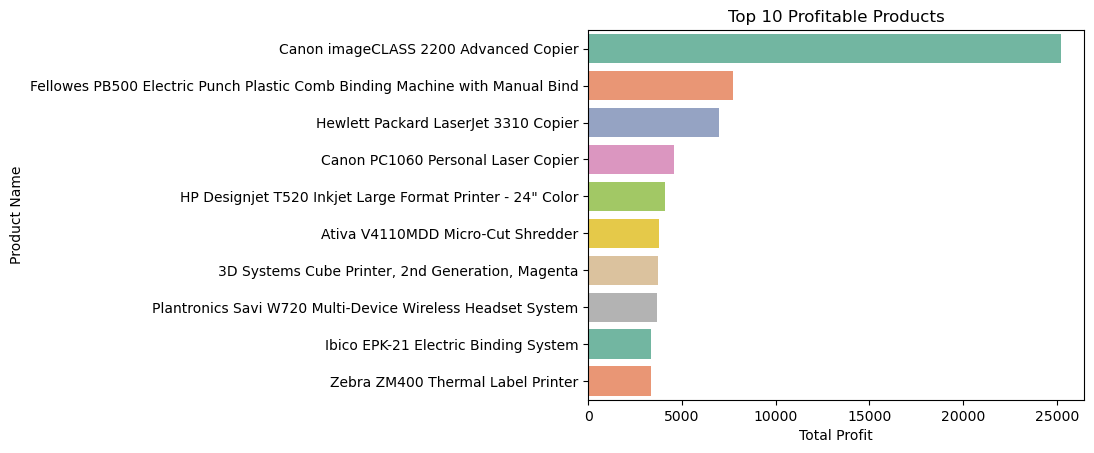

In [57]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='Set2', hue= top_products.index,dodge=False, legend=False)
plt.title('Top 10 Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

**Insight**: These products generate the highest profits, with the **Canon imageCLASS 2200 Advanced Copier** leading significantly, followed by the **Fellowes PB500 Electric Punch Plastic Comb Binding Machine** and the **Hewlett Packard LaserJet 3310 Copier** as top contributors.

#### 7. Under performing products

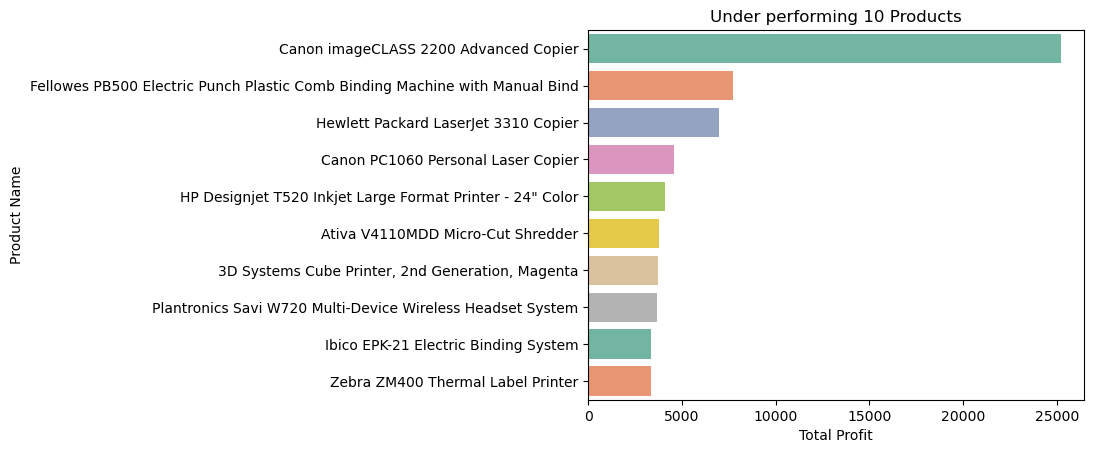

In [58]:
Underperforming_10_Products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).tail(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='Set2',hue=top_products.index, dodge=False, legend=False)
plt.title('Under performing 10 Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

***Insight***: These products incur the highest losses, with the **Cubify CubeX 3D Printer Double Head Print** leading significantly, followed by the **Lexmark MX611dhe Monochrome Laser Printer** and **Cubify CubeX 3D Printer Triple Head Print**.

### 8. Top-Performing Branches
##### Top 10 Branches by Total Sales And Profit

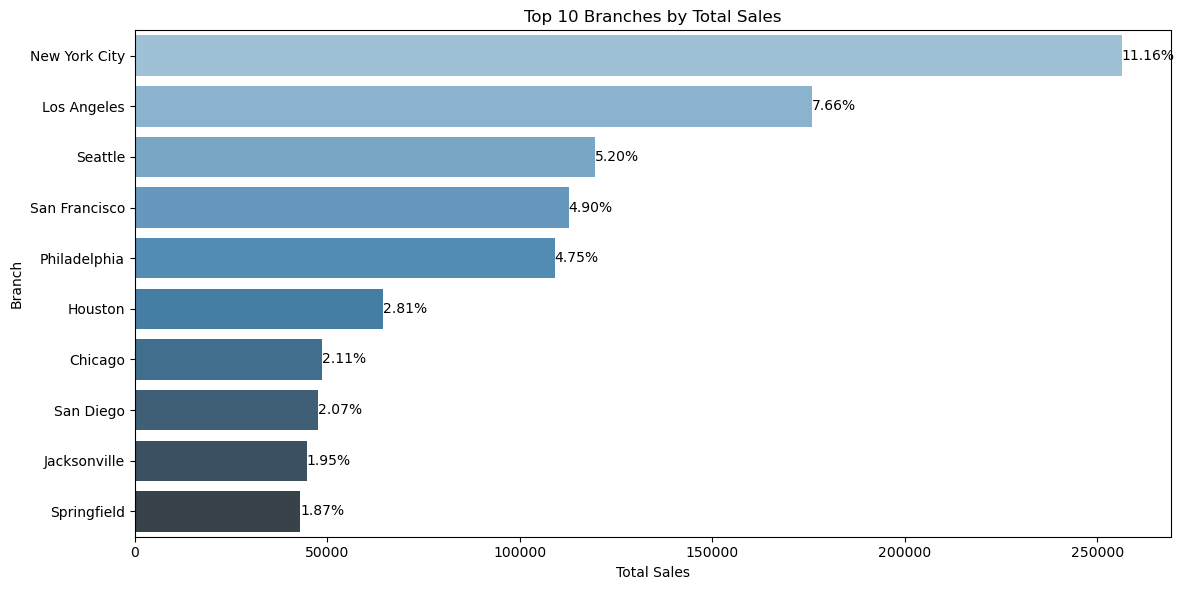

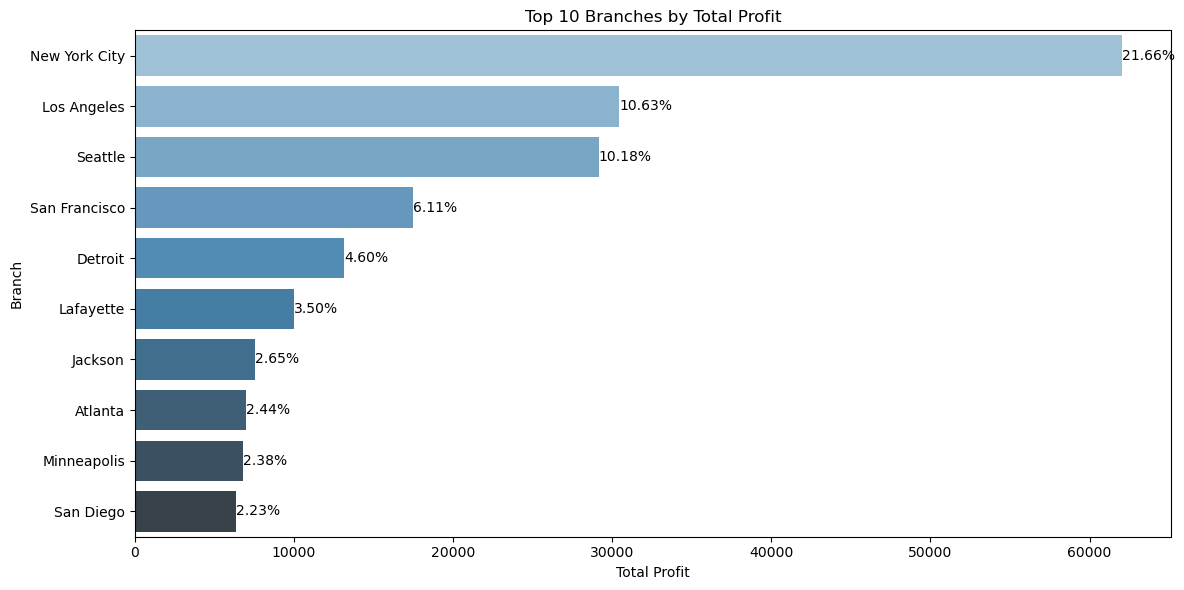

In [59]:
# Aggregate total sales branch
branch_sales = df.groupby('City').agg(
    total_sales=('Sales', 'sum')
).reset_index() 

# Calculate the total sales across all branches
total_sales_all_branches = branch_sales['total_sales'].sum()

# Sort by total_sales and add a new column for the percentage of total sales
branch_sales['percentage_of_total_sales'] = (branch_sales['total_sales'] / total_sales_all_branches) * 100

# Sort the dataframe and show top 10 branches
top_10_branches = branch_sales.sort_values(by='total_sales', ascending=False).head(10).reset_index()



plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='City', data=top_10_branches, palette='Blues_d', hue='City', dodge=False, legend=False)

# Annotate the bars with the percentage of total sales
for index, value in enumerate(top_10_branches['total_sales']):
    plt.text(value, index, f"{top_10_branches['percentage_of_total_sales'].iloc[index]:.2f}%", va='center')

plt.title('Top 10 Branches by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Branch')
plt.tight_layout()
plt.show()

# Aggregate total Profit branch
branch_profit = df.groupby('City').agg(
    total_profit=('Profit', 'sum')
).reset_index() 

# Calculate the total Profit across all branches
total_profit_all_branches = branch_profit['total_profit'].sum()

# Sort by total_profit and add a new column for the percentage of total sales
branch_profit['percentage_of_total_profit'] = (branch_profit['total_profit'] / total_profit_all_branches) * 100

# Sort the dataframe and show top 10 branches
top_10_branches_by_profit = branch_profit.sort_values(by='total_profit', ascending=False).head(10).reset_index()

# Display the result
top_10_branches_by_profit

plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='City', data=top_10_branches_by_profit, palette='Blues_d', hue='City', dodge=False, legend=False)

# Annotate the bars with the percentage of total profit
for index, value in enumerate(top_10_branches_by_profit['total_profit']):
    plt.text(value, index, f"{top_10_branches_by_profit['percentage_of_total_profit'].iloc[index]:.2f}%", va='center')


plt.title('Top 10 Branches by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Branch')
plt.tight_layout()
plt.show()


***Insights*** : 
- New York City leads with the highest sales, contributing 11.16% of total sales, followed by Los Angeles (7.66%) and Seattle (5.20%).
- New York City leads with the highest profit, contributing 21.66% of total profit, followed by Los Angeles (10.63%) and Seattle (10.18%).

### 9. Underperforming Branches: Sales and Profit Analysis  

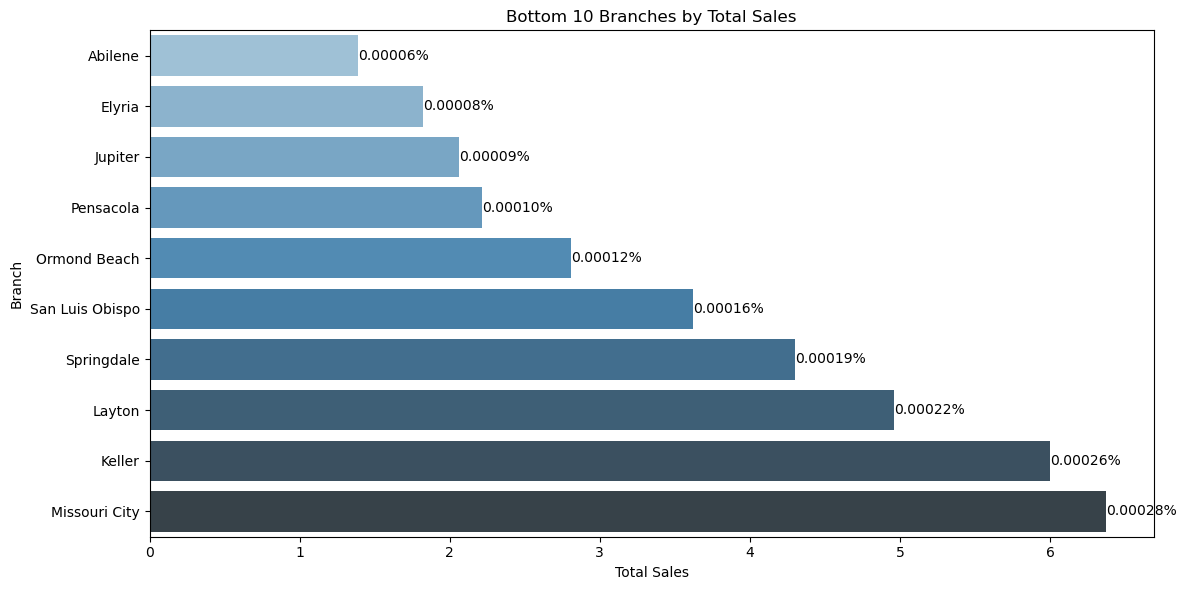

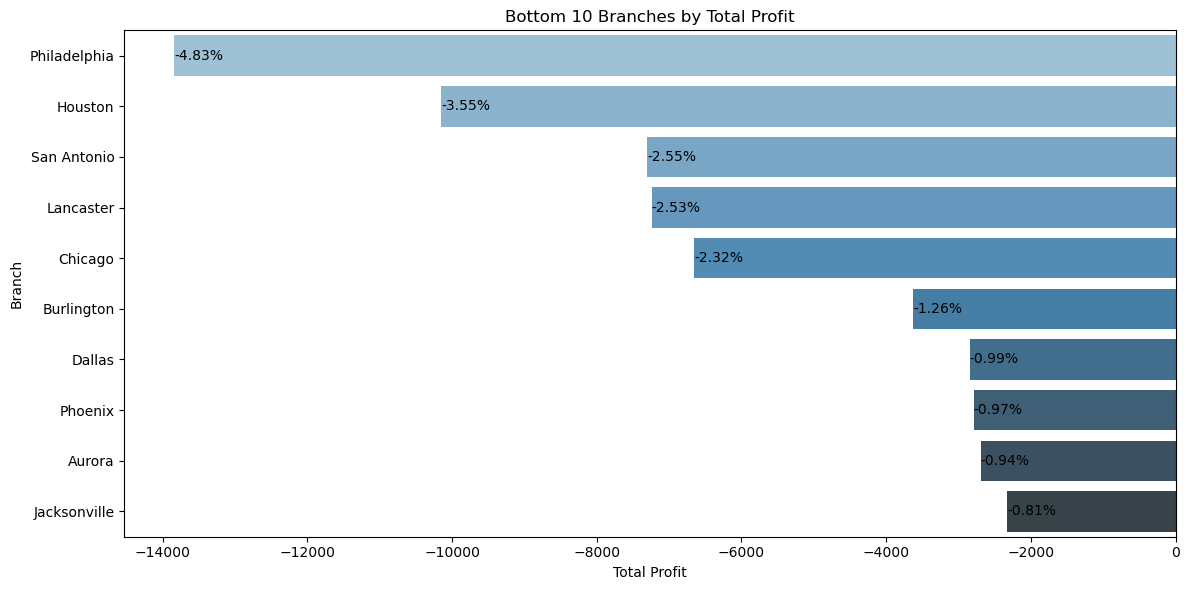

In [60]:
# Select the bottom 10 branches based on total sales
Underperforming_10_Branches = branch_sales.sort_values(by='total_sales', ascending=True).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='City', data=Underperforming_10_Branches, palette='Blues_d',hue='City', dodge=False, legend=False)

# Annotate the bars with the percentage of total sales
for index, value in enumerate(Underperforming_10_Branches['total_sales']):
    plt.text(value, index, 
             f"{Underperforming_10_Branches['percentage_of_total_sales'].iloc[index]:.5f}%", 
             va='center')

# Update the title and labels
plt.title('Bottom 10 Branches by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Branch')
plt.tight_layout()
plt.show()

# Select the bottom 10 branches based on total profit
Underperforming_10_Branches_by_profit = branch_profit.sort_values(by='total_profit', ascending=True).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='City', data=Underperforming_10_Branches_by_profit, palette='Blues_d',hue='City')

# Annotate the bars with the percentage of total profit
for index, value in enumerate(Underperforming_10_Branches_by_profit['total_profit']):
    plt.text(value, index, 
             f"{Underperforming_10_Branches_by_profit['percentage_of_total_profit'].iloc[index]:.2f}%", 
             va='center')

# Update the title and labels
plt.title('Bottom 10 Branches by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Branch')
plt.tight_layout()
plt.show()


***Insight***: 


 **Top 10 Underperforming Branches by Sales:**  
- These branches contribute minimally to overall sales, with **Abilene, Elyria, and Jupiter** having the lowest sales percentages.  

 **Top 10 Underperforming Branches by Profit:**  
- Branches like **Philadelphia, Houston, and San Antonio** show significant losses, negatively impacting overall profitability.

### 10. Customer segment

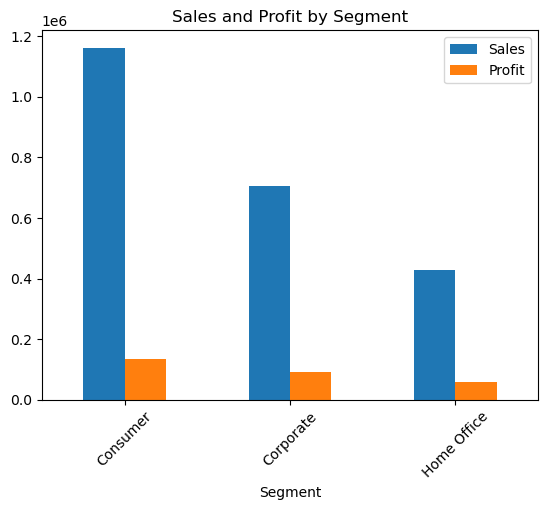

In [61]:
import os
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum()


# Create the bar plot
ax = segment_analysis.plot(kind='bar', title='Sales and Profit by Segment', rot=45)

# Save the plot as an image file
plt.savefig(os.path.join(output_dir, 'sales_profit_by_segment.png'), dpi=300, bbox_inches='tight')

# Optionally, show the plot
plt.show()

***Insights*** : The Consumer segment drives the highest sales and profit, followed by Corporate with moderate performance, while Home Office contributes the least in both sales and profit.

### 11. Shipping Mode Analysis
#### Average Shipping Time and Profit

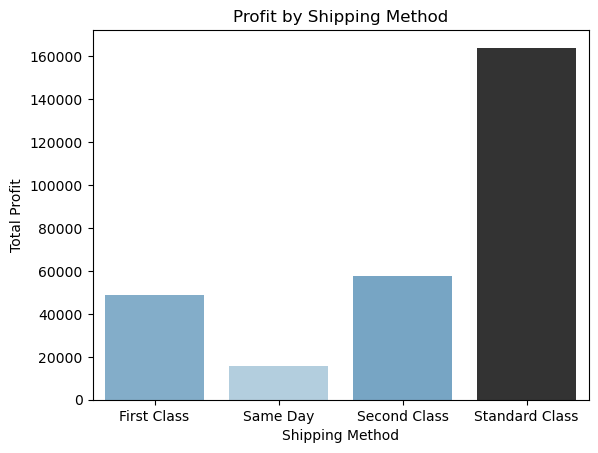

In [62]:
df['Shipping Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

shipping_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum', 
    'Profit': 'sum', 
    'Shipping Time (Days)': 'mean'
}).reset_index()

sns.barplot(data=shipping_analysis, x='Ship Mode', y='Profit', palette='Blues_d', hue= 'Profit', dodge=False, legend=False)
plt.title('Profit by Shipping Method')
plt.xlabel('Shipping Method')
plt.ylabel('Total Profit')
plt.show()

**Key Findings**:
- Standard Class dominates sales and profit despite the longest shipping time, while Same Day offers the fastest shipping but generates the least sales and profit.

# Insights and Recommendations

## Key Insights

1. **Category Performance**:
   - **Technology**: Top category with **$836,154K** in sales and **$145,455K** in profit (36.41% of total sales).
   - **Furniture**: Generates **$741,999K** in sales but only **$18,451K** in profit, indicating inefficiencies.
   - **Office Supplies**: Accounts for **$719,047K** in sales and **$122,490K** in profit.

2. **Regional Trends**:
   - **West Region**: Best performer with **$725,458K** in sales and **$108,418K** in profit.
   - **Central Region**: Underperforming with **$501,240K** in sales and only **$39,706K** in profit.
   - **South Region**: Contributes **$678,781K** in sales but still falls short compared to the West.

3. **Yearly Trends**:
   - **2017**: Best-performing year with **$693,215K** in sales and **$94,440K** in profit.
   - **Seasonality**: Q4 shows the highest profitability, indicating strong seasonal demand.

4. **City-Level Analysis**:
   - **New York City**: Dominates with **$256,368K** in sales and **$62,037K** in profit.
   - **Underperforming Branches**: Abilene, Elyria, and Jupiter need urgent attention due to low sales.

5. **Shipping Modes**:
   - **Standard Class**: Most utilized, generating **$1,358,216** in sales but has the longest delivery time.
   - **First Class**: Balances speed and revenue, suggesting potential for premium customer experiences.

6. **Correlation Analysis**:
   - **Sales & Profit**: Moderate positive correlation (0.48).
   - **Discount & Profit**: Negative correlation (-0.22), indicating excessive discounting harms profitability.

## Recommendations

1. **Improve Furniture Profitability**:
   - Focus on reducing operational costs and evaluating high-margin alternatives.

2. **Boost Underperforming Regions**:
   - Invest in marketing campaigns targeting the Central and South regions.

3. **Expand Best-Selling Products**:
   - Prioritize high-profit products and increase promotions for similar items.

4. **Address Underperforming Branches**:
   - Investigate reasons for underperformance and develop localized strategies.

5. **Optimize Discounting Strategies**:
   - Reassess current discount policies, especially in the Furniture category.

6. **Segment-Specific Strategies**:
   - Engage the Consumer segment more and boost the Home Office segment.

7. **Improve Shipping Efficiency**:
   - Reduce delivery time for Standard Class shipping and optimize Same Day shipping.

8. **Replicate Success in Top Cities**:
   - Apply successful strategies from New York City to other high-potential cities.

9. **Replicate Yearly Growth Trends**:
   - Analyze strategies from 2017 to replicate growth in future years.